<a href="https://colab.research.google.com/github/dagmaros27/AIMS_Notebooks/blob/main/ClimateIndicesIntroduction_Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as sps
import xarray as xr
import matplotlib.pyplot as plt
import sys
import urllib
import os

In [ ]:
yourdrive = '/content/drive/MyDrive/data/' # Be sure to create this directory in your AIMS google drive area.
# Mount google drive into this runtime
if not os.path.exists('/content/drive'):
    from google.colab import drive
    drive.mount('/content/drive')
sstdata = yourdrive+'noaaoisst.mon.mean.nc'
if not os.path.exists(sstdata):
    url='https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2/sst.mnmean.nc'
    urllib.request.urlretrieve(url, sstdata)
    print(f"File downloaded to {sstdata}")
else:
    print(f"File already exists at {sstdata}")
#
rainfall_cmap=yourdrive+'cmapprecip.mon.mean.nc'
if not os.path.exists(rainfall_cmap):
    url='https://downloads.psl.noaa.gov/Datasets/cmap/std/precip.mon.mean.nc'
    urllib.request.urlretrieve(url, rainfall_cmap)
    print(f"File downloaded to {rainfall_cmap}")
else:
    print(f"File already exists at {rainfall_cmap}")

Mounted at /content/drive
File already exists at /content/drive/MyDrive/data/noaaoisst.mon.mean.nc
File already exists at /content/drive/MyDrive/data/cmapprecip.mon.mean.nc


# Tuesday's practcal ends here

In [ ]:
# Define a index dictionary containing latitude and longitude ranges which define box over which to average for index.
indexdict={}
indexdict['NINO12'] = [-10,0,270,280]
indexdict['NINO3']  = [-5,5,210,270]
indexdict['NINO34'] = [-5,5,190,240]
indexdict['NINO4']  = [-5,5,160,210]
indexdict['BengNINO'] =  [-20,-10,8,15]
indexdict['SIOD']={'west': [-37,-27,55,65]}
indexdict['SIOD']['east']  = [-28,-18,90,100]
indexdict['IOD']={'west':[-10,10,50,70]}
indexdict['IOD']['east'] = [-10,0,90,110]
indexdict['SAsummerRain'] = [-32,-13,23,35]
'''WHERE ARE THIS LOCATED ON A MAP?? USE GOOGLE EARTH OR SIMILAR TO LOCATE THESE AREAS BY DRAWING A PATH/POLYGON WITH MOUSE ON MAP.'''

'WHERE ARE THIS LOCATED ON A MAP?? USE GOOGLE EARTH OR SIMILAR TO LOCATE THESE AREAS BY DRAWING A PATH/POLYGON WITH MOUSE ON MAP.'

In [ ]:
def climate_index(datafile,whichindex,varname='sst'):
    '''CAREFULLY GO THROUGH THIS FUNCTION AND UNDERSTANDING EACH LINE OF CODE
    WHAT IS THE FUNCTION PRODUCING? WHAT DOES IT TAKE AS INPUT.
    NOW WRITE A CORRECT DESCRIPTION AND USAGE GUIDANCE FOR THIS FUNCTION HERE IN PLACE OF THIS TEXT.'''
    time_range = slice('1982-01-01','2022-12-31')
    indx = indexdict[whichindex]
    if isinstance(indx,list):
        lt1,lt2,ln1,ln2 = indx
        lat_range, lon_range = slice(lt2,lt1), slice(ln1,ln2)
        data_area = xr.open_dataset(datafile).sel(lat=lat_range,lon=lon_range,time=time_range)
        dtime = data_area.time
        timemonth = dtime.dt.month
        # index = data_area.mean('lon').mean('lat') ### Alt. using xarray
        data = data_area[varname]
        index = np.nanmean(data,(1,2)) # Ensures nans are managed
        index_anoms = np.zeros(index.shape)
        index_std = np.zeros(index.shape)
        for i in range(1,13):
            ix = np.where(timemonth[:] == i+1)
            index_std[ix] = sps.zscore(index[ix])
            index_anoms[ix] = index[ix]-np.nanmean(index[ix])
    elif isinstance(indx,dict):
        index_std_dict = {}
        for ky in ['west','east']:
            lt1,lt2,ln1,ln2 = indx[ky]
            lat_range, lon_range = slice(lt2,lt1), slice(ln1,ln2)
            data_area = xr.open_dataset(datafile).sel(lat=lat_range,lon=lon_range,time=time_range)
            dtime = data_area.time
            timemonth = dtime.dt.month
            # index = data_area.mean('lon').mean('lat') ### Alt. using xarray
            data = data_area[varname]
            index = np.nanmean(data,(1,2)) # Ensures nans are managed
            index_anoms = np.zeros(index.shape)
            index_std = np.zeros(index.shape)
            for i in range(1,13):
                ix = np.where(timemonth[:] == i+1)
                index_std[ix] = sps.zscore(index[ix])
                index_anoms[ix] = index[ix]-np.nanmean(index[ix])
            index_std_dict[ky] = index_std
        index_std = index_std_dict['west'] - index_std_dict['east']

    #return dtime, index_std, index_anoms, index
    return dtime, index_std

In [ ]:
dtime, nino34 = climate_index(sstdata,'NINO34')
dtime, siod = climate_index(sstdata,'SIOD')
dtime, iod = climate_index(sstdata,'IOD')
dtime, biod = climate_index(sstdata,'BengNINO')
dtime, sa_rain = climate_index(rainfall_cmap,'SAsummerRain',varname='precip')

/tmp/ipython-input-2800484496.py:21: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:38: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:38: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:38: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:38: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:21: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])
/tmp/ipython-input-2800484496.py:21: RuntimeWarning: Mean of empty slice
  index_anoms[ix] = index[ix]-np.nanmean(index[ix])


In [ ]:
data = np.vstack((nino34,siod,iod,biod,sa_rain)).T
var_names = ['nino34','siod','iod', 'Bnino','SA_rain']

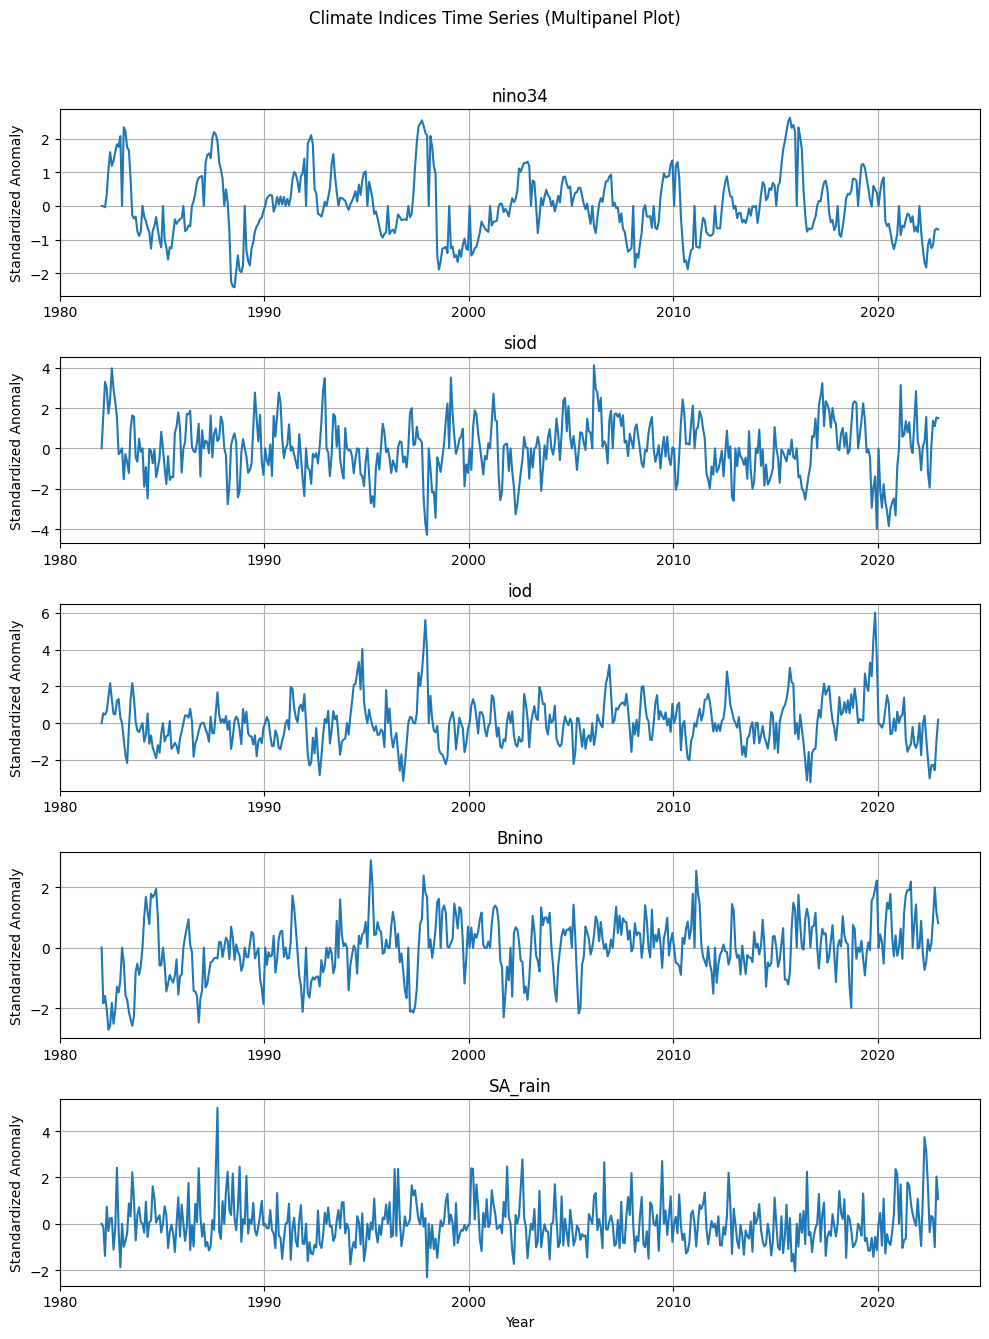

In [ ]:
decimal_year = dtime.dt.year + (dtime.dt.month/12.-1/24.) # mid-month decimal yr

fig, axes = plt.subplots(nrows=len(var_names), ncols=1, figsize=(10, 15), sharex=False)

for i, var_name in enumerate(var_names):
    axes[i].plot(decimal_year, data[:, i], label=var_name)
    axes[i].set_title(var_name)
    axes[i].grid(True)
    axes[i].set_ylabel('Standardized Anomaly')

axes[-1].set_xlabel('Year')
plt.suptitle('Climate Indices Time Series (Multipanel Plot)', y=0.92)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(data.T)
#### Print table of correlations with variable names
print('Correlation matrix: Full time series')
print('-----------------')
print('      ',end='    ')
for var in var_names:
    print(f'{var:6s}',end='  ')
print('    ')
for i, var in enumerate(var_names):
    print(f'{var:6s}',end='')
    for j in np.arange(0,5):
        print(f'{correlation_matrix[i,j]:8.2f}',end='')
    print('')

Correlation matrix: Full time series
-----------------
          nino34  siod    iod     Bnino   SA_rain      
nino34    1.00   -0.09    0.33   -0.21   -0.17
siod     -0.09    1.00   -0.00   -0.12    0.12
iod       0.33   -0.00    1.00    0.05   -0.02
Bnino    -0.21   -0.12    0.05    1.00   -0.09
SA_rain   -0.17    0.12   -0.02   -0.09    1.00


QUESTION: What do you interpret by this? Is El-Nino/La-Nina associated with SA_rain?

Okay, what is happening next?

In [ ]:
maskDJF = np.ones(data.shape, dtype=bool)
dtmonths=dtime.dt.month
for ix,mn in enumerate(dtmonths):
        if mn in [12,1,2]:
            maskDJF[ix,:] = False

ixDJF = np.where(~maskDJF[:,0])[0]

In [ ]:
dataDJF=data[ixDJF,:]
correlation_matrix = np.corrcoef(dataDJF.T)
#### Print table of correlations with variable names
print('Correlation matrix: DJF')
print('-----------------')
print('      ',end='    ')
for var in var_names:
    print(f'{var:6s}',end='  ')
print('    ')
for i, var in enumerate(var_names):
    print(f'{var:6s}',end='')
    for j in np.arange(0,5):
        print(f'{correlation_matrix[i,j]:8.2f}',end='')
    print('')

Correlation matrix: DJF
-----------------
          nino34  siod    iod     Bnino   SA_rain      
nino34    1.00   -0.32    0.17   -0.03   -0.55
siod     -0.32    1.00   -0.24   -0.04    0.31
iod       0.17   -0.24    1.00    0.14   -0.03
Bnino    -0.03   -0.04    0.14    1.00   -0.04
SA_rain   -0.55    0.31   -0.03   -0.04    1.00


FINAL QUESTION FOR TODAY: What do you interpret by this new correlation matrix? Is El-Nino/La-Nina associated with SA_rain now? What is different, what changed?